In [1]:
import pandas as pd
import missingno as msno
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from sklearn.neighbors import LocalOutlierFactor
import warnings
import math
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set()
sns.set_style("whitegrid")

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../dados/cemaden1.csv', sep=';', decimal=',')
# df = df.append(pd.read_csv('../dados/cemaden2.csv', sep=';',decimal=','),ignore_index=True)
df = df.drop(columns = 'Unnamed: 8')
df
df[["nomeEstacao","latitude","longitude"]] .groupby(["latitude","longitude"]).first().reset_index().to_csv('test.csv')

In [12]:
df_interpolados = pd.read_csv('../dados/dados interpolados mes.csv')

In [3]:
df_places = gpd.read_file('../dados/hex8_data_geometry_curitiba3.geojson')
df_places.head()

,date,score,hex,NOME,geometry
0,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,"POLYGON ((-49.27456 -25.53764, -49.27041 -25.5..."
1,2020-03-11,100,88a831ace1fffff,BAIRRO NOVO,"POLYGON ((-49.25623 -25.53586, -49.25208 -25.5..."
2,2020-04-01,100,88a831acebfffff,BAIRRO NOVO,"POLYGON ((-49.26539 -25.53675, -49.26124 -25.5..."
3,2020-07-12,100,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5..."
4,2020-04-25,99,88a831acedfffff,BAIRRO NOVO,"POLYGON ((-49.25036 -25.54221, -49.24621 -25.5..."


In [93]:
df_interpolados

,dataHora,valorMedido,latitude,longitude
0,2015-01-01 00:00:00,0.000000,-49.387605,-25.433210
1,2015-01-01 00:00:00,0.000000,-49.385034,-25.446811
2,2015-01-01 00:00:00,0.000000,-49.384311,-25.425967
3,2015-01-01 00:00:00,0.000000,-49.383186,-25.481245
4,2015-01-01 00:00:00,0.000000,-49.382463,-25.460410
...,...,...,...,...
16229563,2017-12-31 23:00:00,5.596326,-49.194792,-25.490674
16229564,2017-12-31 23:00:00,5.596347,-49.194503,-25.393663
16229565,2017-12-31 23:00:00,5.596326,-49.194076,-25.469833
16229566,2017-12-31 23:00:00,5.596326,-49.191498,-25.483430


In [5]:
df.nomeEstacao.unique()

array(['Butiatuvinha', 'Cachoeira', 'Vista Alegre', 'Boa Vista',
       'Santa Felicidade', 'São Braz', 'Atuba', 'CIC ', 'Umbará',
       'Novo Mundo'], dtype=object)

In [6]:
df.groupby('nomeEstacao').nunique()


,municipio,codEstacao,uf,latitude,longitude,datahora,valorMedida
nomeEstacao,,,,,,,
Atuba,1,1,1,1,1,928,29
Boa Vista,1,1,1,1,1,1010,24
Butiatuvinha,1,1,1,1,1,952,27
CIC,1,1,1,1,1,594,26
Cachoeira,1,1,1,1,1,962,26
Novo Mundo,1,1,1,1,1,1036,27
Santa Felicidade,1,1,1,1,1,1010,26
São Braz,1,1,1,1,1,777,2
Umbará,1,1,1,1,1,928,22


In [7]:
df['datanorm'] = df.datahora.astype('datetime64[ns]')
df

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida,datanorm
0,CURITIBA,410690201A,PR,Butiatuvinha,-49.36184,-25.41118,2018-01-01 02:30:00.0,0.2,2018-01-01 02:30:00
1,CURITIBA,410690201A,PR,Butiatuvinha,-49.36184,-25.41118,2018-01-01 05:40:00.0,0.2,2018-01-01 05:40:00
2,CURITIBA,410690201A,PR,Butiatuvinha,-49.36184,-25.41118,2018-01-01 18:30:00.0,1.2,2018-01-01 18:30:00
3,CURITIBA,410690201A,PR,Butiatuvinha,-49.36184,-25.41118,2018-01-01 19:40:00.0,0.6,2018-01-01 19:40:00
4,CURITIBA,410690201A,PR,Butiatuvinha,-49.36184,-25.41118,2018-01-01 19:50:00.0,0.6,2018-01-01 19:50:00
...,...,...,...,...,...,...,...,...,...
9225,CURITIBA,410690211A,PR,Novo Mundo,-49.28797,-25.48784,2018-01-31 19:50:00.0,0.0,2018-01-31 19:50:00
9226,CURITIBA,410690211A,PR,Novo Mundo,-49.28797,-25.48784,2018-01-31 20:50:00.0,0.0,2018-01-31 20:50:00
9227,CURITIBA,410690211A,PR,Novo Mundo,-49.28797,-25.48784,2018-01-31 21:50:00.0,0.0,2018-01-31 21:50:00
9228,CURITIBA,410690211A,PR,Novo Mundo,-49.28797,-25.48784,2018-01-31 22:50:00.0,0.0,2018-01-31 22:50:00


In [95]:
df_interpolados['datanorm'] = df_interpolados.dataHora.astype('datetime64[ns]')
df_interpolados

,dataHora,valorMedido,latitude,longitude,datanorm
0,2015-01-01 00:00:00,0.000000,-49.387605,-25.433210,2015-01-01 00:00:00
1,2015-01-01 00:00:00,0.000000,-49.385034,-25.446811,2015-01-01 00:00:00
2,2015-01-01 00:00:00,0.000000,-49.384311,-25.425967,2015-01-01 00:00:00
3,2015-01-01 00:00:00,0.000000,-49.383186,-25.481245,2015-01-01 00:00:00
4,2015-01-01 00:00:00,0.000000,-49.382463,-25.460410,2015-01-01 00:00:00
...,...,...,...,...,...
16229563,2017-12-31 23:00:00,5.596326,-49.194792,-25.490674,2017-12-31 23:00:00
16229564,2017-12-31 23:00:00,5.596347,-49.194503,-25.393663,2017-12-31 23:00:00
16229565,2017-12-31 23:00:00,5.596326,-49.194076,-25.469833,2017-12-31 23:00:00
16229566,2017-12-31 23:00:00,5.596326,-49.191498,-25.483430,2017-12-31 23:00:00


In [9]:
df_sum = df.groupby(['codEstacao']).mean()


In [8]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.latitude, df.longitude))
gdf = gdf.set_crs(df_places.crs)
print(gdf.crs)

epsg:4326


In [9]:
gdf = df_places.sjoin(gdf)

In [10]:
gdf

,date,score,hex,NOME,geometry,index_right,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida,datanorm
29,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",7295,CURITIBA,410690210A,PR,Umbará,-49.284,-25.555,2018-01-04 10:40:00.0,0.0,2018-01-04 10:40:00
30,2020 -04 -21,100,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",7295,CURITIBA,410690210A,PR,Umbará,-49.284,-25.555,2018-01-04 10:40:00.0,0.0,2018-01-04 10:40:00
29,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",7294,CURITIBA,410690210A,PR,Umbará,-49.284,-25.555,2018-01-04 09:40:00.0,0.0,2018-01-04 09:40:00
30,2020 -04 -21,100,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",7294,CURITIBA,410690210A,PR,Umbará,-49.284,-25.555,2018-01-04 09:40:00.0,0.0,2018-01-04 09:40:00
29,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",7293,CURITIBA,410690210A,PR,Umbará,-49.284,-25.555,2018-01-04 08:40:00.0,0.0,2018-01-04 08:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2020 -05 -31,100,88a804d9a3fffff,SANTA FELICIDADE,"POLYGON ((-49.34353 -25.41972, -49.33938 -25.4...",5642,CURITIBA,410690207A,PR,São Braz,-49.342,-25.417,2018-01-27 18:20:00.0,0.0,2018-01-27 18:20:00
776,2020 -05 -25,99,88a804d9a3fffff,SANTA FELICIDADE,"POLYGON ((-49.34353 -25.41972, -49.33938 -25.4...",5643,CURITIBA,410690207A,PR,São Braz,-49.342,-25.417,2018-01-27 19:20:00.0,0.0,2018-01-27 19:20:00
777,2020 -05 -31,100,88a804d9a3fffff,SANTA FELICIDADE,"POLYGON ((-49.34353 -25.41972, -49.33938 -25.4...",5643,CURITIBA,410690207A,PR,São Braz,-49.342,-25.417,2018-01-27 19:20:00.0,0.0,2018-01-27 19:20:00
776,2020 -05 -25,99,88a804d9a3fffff,SANTA FELICIDADE,"POLYGON ((-49.34353 -25.41972, -49.33938 -25.4...",5644,CURITIBA,410690207A,PR,São Braz,-49.342,-25.417,2018-01-27 20:20:00.0,0.0,2018-01-27 20:20:00


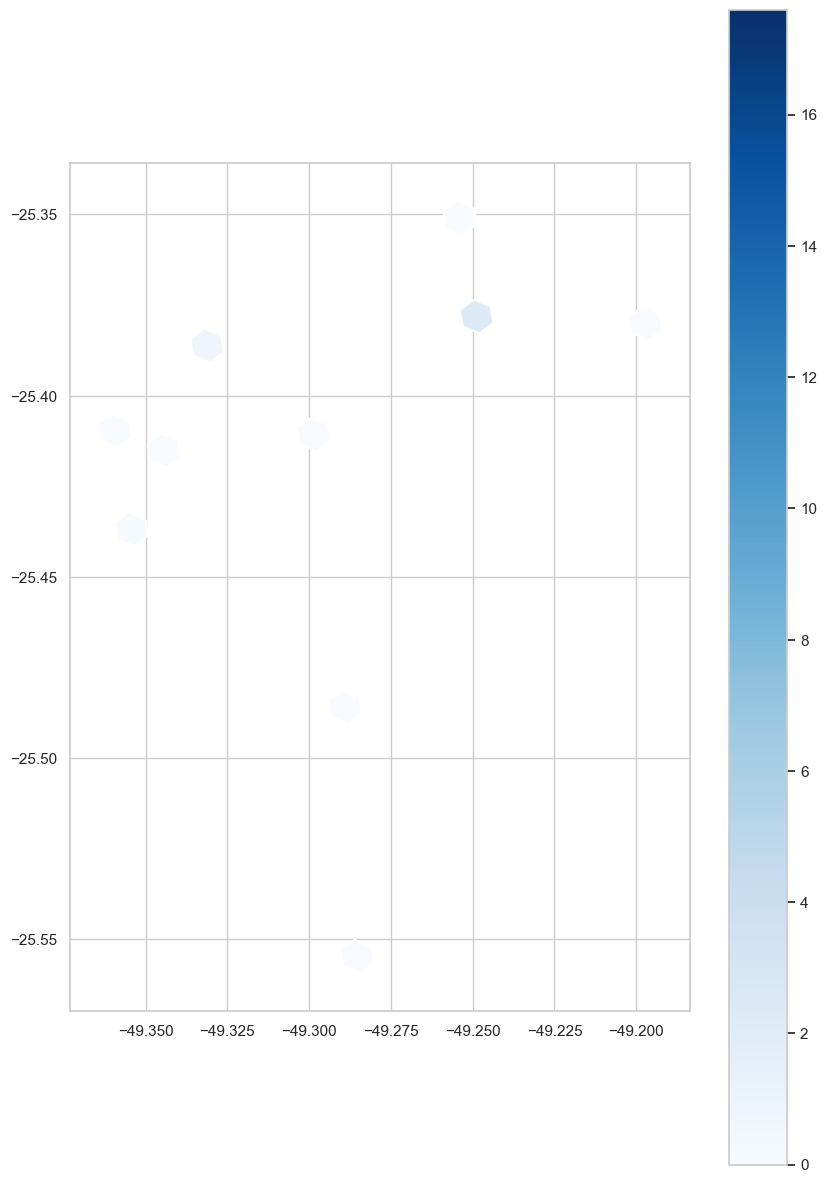

In [11]:
ax = gdf.plot(column="valorMedida", cmap='Blues', figsize = (10,15), legend=True)
# plt.colorbar()
plt.show()